In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection  import cross_val_score, StratifiedKFold
from sklearn import cross_validation, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [44]:
def fit_clf(clf, X_train, y_train, X_test, y_test):
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    y_pred_train = np.ones(y_train.shape[0])
    i = 0
    for train, test in kf.split(X_train, y=y_train):
        y_pred_train[test] = clf.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])[:,1]
        print("fold {}, ROC AUC: {:.3f}".format(i, metrics.roc_auc_score(y_train.iloc[test], y_pred_train[test])))
        i += 1
    print(metrics.roc_auc_score(y_train, y_pred_train))

    y_pred_test = clf.predict_proba(X_test)[:,1]
    plt.figure()
    thresholds = np.linspace(0.01, 1.00, 100)
    mcc = np.array([metrics.matthews_corrcoef(y_test, y_pred_test>thr) for thr in thresholds])
    plt.plot(thresholds, mcc)
    best_threshold = thresholds[mcc.argmax()]
    print("MCC: %f" % mcc.max())
    
    return clf, best_threshold


In [47]:
def fit_clf0(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    y_pred_test = clf.predict_proba(X_test)[:,1]
    plt.figure()
    thresholds = np.linspace(0.01, 1.00, 100)
    mcc = np.array([metrics.matthews_corrcoef(y_test, y_pred_test>thr) for thr in thresholds])
    plt.plot(thresholds, mcc)
    best_threshold = thresholds[mcc.argmax()]
    print("MCC: %f" % mcc.max())
    
    return clf, best_threshold


In [27]:
important_indices = pd.read_csv('important_indices.csv', index_col=0).iloc[:,0].values

In [26]:
important_indicesx

array([  0,   1,   8,   9,  10,  12,  13,  15,  21,  26,  35,  37,  38,
       394, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735,
       736, 741, 743, 744, 755, 756, 757, 769, 771, 776, 780, 781, 784,
       786, 788, 792, 793, 798, 799, 803, 805, 810, 826, 827, 828, 829,
       830, 831, 832, 836, 838, 839, 843, 848, 850, 851, 854, 864, 866,
       872, 885], dtype=int64)

In [28]:
X = pd.read_csv("../input/train_numeric.csv", index_col=0, usecols=np.concatenate([[0], important_indices + 1]))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [29]:
y = pd.read_csv("../input/train_numeric.csv", index_col=0, usecols=[0,969])

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
len(y)

1183747

fold 0, ROC AUC: 0.709
fold 1, ROC AUC: 0.695
fold 2, ROC AUC: 0.710
fold 3, ROC AUC: 0.675
fold 4, ROC AUC: 0.701
0.6973238087551616


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.183905


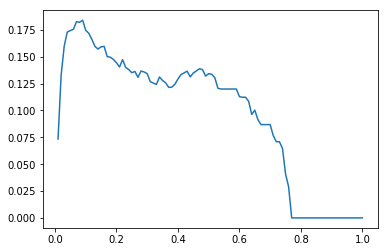

In [30]:
n = 200000
clf = XGBClassifier(max_depth=7, base_score=0.006, max_delta_step=1)
[clf, best_threshold] = fit_clf(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

fold 0, ROC AUC: 0.691
fold 1, ROC AUC: 0.692
fold 2, ROC AUC: 0.698
fold 3, ROC AUC: 0.712
fold 4, ROC AUC: 0.690
0.6965603582444333


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.179568


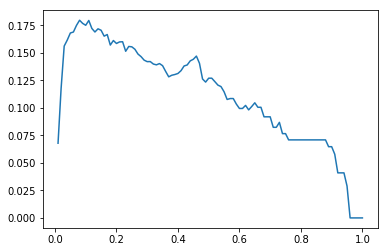

In [31]:
n = 200000
clf = XGBClassifier(max_depth=7, base_score=0.006, max_delta_step=5)
[clf, best_threshold] = fit_clf(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

fold 0, ROC AUC: 0.697
fold 1, ROC AUC: 0.693
fold 2, ROC AUC: 0.674
fold 3, ROC AUC: 0.664
fold 4, ROC AUC: 0.703
0.6858380972458438


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.172603


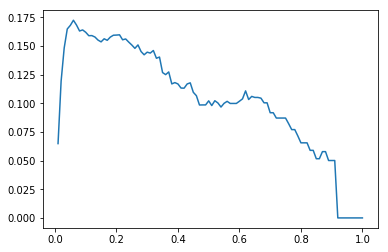

In [32]:
n = 200000
clf = XGBClassifier(max_depth=7, base_score=0.006, max_delta_step=10)
[clf, best_threshold] = fit_clf(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

fold 0, ROC AUC: 0.686
fold 1, ROC AUC: 0.730
fold 2, ROC AUC: 0.686
fold 3, ROC AUC: 0.666
fold 4, ROC AUC: 0.680
0.6892835432455539


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.185881


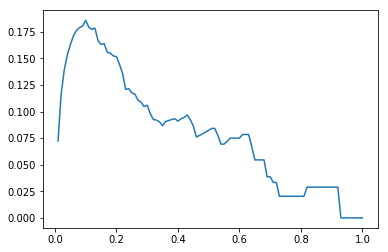

In [45]:
n = 200000

clf = XGBClassifier(booster='gbtree', colsample_bytree=0.6, min_child_weight=5, subsample=0.9, objective='binary:logistic', max_depth=14, reg_lambda=4, base_score=0.006)
[clf, best_threshold] = fit_clf(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

fold 0, ROC AUC: 0.695
fold 1, ROC AUC: 0.665
fold 2, ROC AUC: 0.694
fold 3, ROC AUC: 0.688
fold 4, ROC AUC: 0.703
0.6889681802045354


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.174366


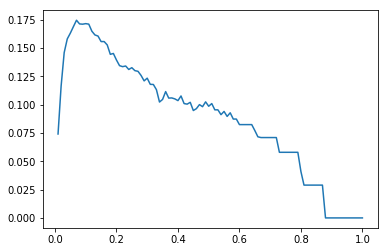

In [46]:
n = 200000

clf = XGBClassifier(booster='gbtree', colsample_bytree=0.6, min_child_weight=5, subsample=0.9, objective='binary:logistic', max_depth=14, reg_lambda=4, base_score=0.006)
[clf, best_threshold] = fit_clf(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.181403


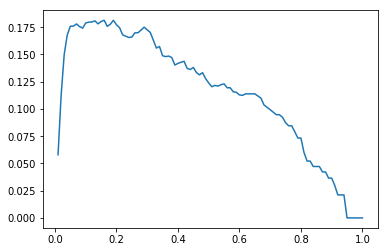

In [50]:
n = 800000

clf = XGBClassifier(booster='gbtree', colsample_bytree=0.6, min_child_weight=5, subsample=0.9, objective='binary:logistic', max_depth=14, reg_lambda=4, base_score=0.006)
[clf, best_threshold] = fit_clf0(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.179197


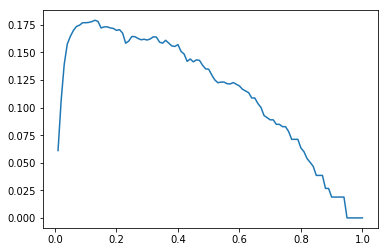

In [51]:
n = 700000

clf = XGBClassifier(booster='gbtree', colsample_bytree=0.6, min_child_weight=5, subsample=0.9, objective='binary:logistic', max_depth=14, reg_lambda=4, base_score=0.006)
[clf, best_threshold] = fit_clf0(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.179197


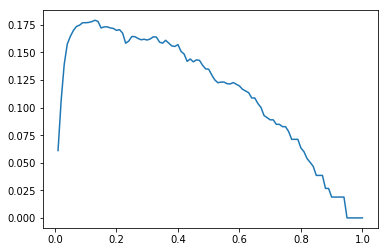

In [52]:
[clf, best_threshold] = fit_clf0(clf, X[:n], y[:n]['Response'], X[(n+1):(2*n)], y[(n+1):(2*n)]['Response'])

C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.180244


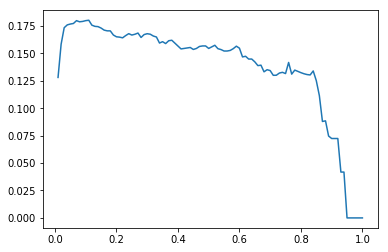

In [56]:
n = 200000
clf = XGBClassifier(max_depth=16, base_score=0.006, max_delta_step=1)
[clf, best_threshold] = fit_clf0(clf, X[0:n:2], y[0:n:2]['Response'], X[1:n:2], y[1:n:2]['Response'])

MCC: 0.178002


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


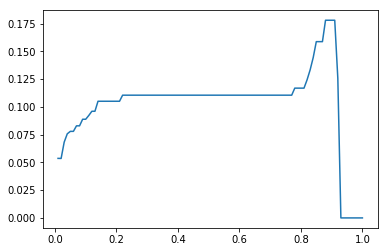

In [62]:
n = 10000
clf = XGBClassifier(max_depth=16, base_score=0.006)
[clf, best_threshold] = fit_clf0(clf, X[0:n:2], y[0:n:2]['Response'], X[1:n:2], y[1:n:2]['Response'])

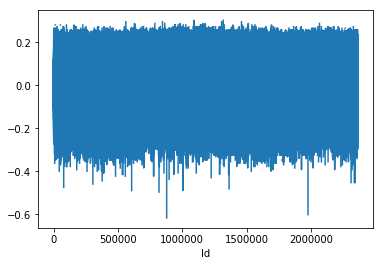

In [67]:
X["L0_S0_F2"].plot()

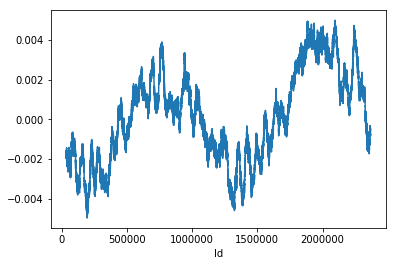

In [90]:
X["L0_S0_F2"].dropna().rolling(10000).mean().plot()

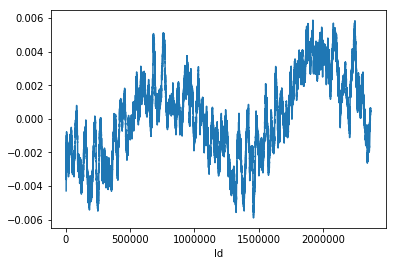

In [94]:
X["L0_S0_F2"].rolling(10000, min_periods=1000).mean().plot()

In [95]:
X.rolling(10000, min_periods=1000).mean()

,L0_S0_F0,L0_S0_F2,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S1_F24,L0_S1_F28,L0_S2_F36,L0_S2_F60,L0_S3_F80,...,L3_S30_F3809,L3_S30_F3829,L3_S32_F3850,L3_S33_F3857,L3_S33_F3859,L3_S33_F3865,L3_S35_F3889,L3_S35_F3896,L3_S36_F3920,L3_S38_F3960
Id,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
X.mean()

L0_S0_F0        5.456013e-05
L0_S0_F2        9.128575e-05
L0_S0_F16       6.722445e-07
L0_S0_F18       5.235493e-06
L0_S0_F20       2.857692e-04
L0_S1_F24       6.259664e-05
L0_S1_F28      -1.657373e-04
L0_S2_F36       4.406694e-04
L0_S2_F60       4.702214e-04
L0_S3_F80      -1.063345e-04
L0_S5_F116      1.743120e-04
L0_S6_F122     -1.608671e-04
L0_S6_F132      1.320047e-04
L1_S24_F1846   -1.443102e-04
L3_S29_F3315    2.059450e-04
L3_S29_F3321   -1.643116e-04
L3_S29_F3324    1.016301e-04
L3_S29_F3327    2.908999e-06
L3_S29_F3330    6.737053e-06
L3_S29_F3333   -1.214670e-04
L3_S29_F3336    2.072829e-05
L3_S29_F3339   -2.523247e-05
L3_S29_F3342    8.891070e-05
L3_S29_F3345    4.931634e-05
L3_S29_F3348   -1.790593e-05
L3_S29_F3351   -1.638150e-04
L3_S29_F3354   -5.893113e-05
L3_S29_F3373   -1.177872e-04
L3_S29_F3379    1.593340e-04
L3_S29_F3382    4.547846e-05
                    ...     
L3_S30_F3519   -1.257832e-04
L3_S30_F3534    1.170093e-07
L3_S30_F3544    6.940885e-05
L3_S30_F3554  

In [10]:
best_threshold

0.32

In [9]:
X_test = pd.read_csv('../input/test_numeric.csv', index_col=0, usecols=np.concatenate([[0], important_indices + 1]))

NameError: name 'important_indices' is not defined

In [44]:
preds = (clf.predict_proba(X_test)[:,1] > best_threshold).astype(np.int8)
sub = pd.read_csv("../input/sample_submission.csv", index_col=0)
sub["Response"] = preds
sub.to_csv("submission.csv.gz", compression="gzip")

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
